In [2]:
!pip install ultralytics

     ---------------------------------------- 14.7/14.7 MB 1.8 MB/s eta 0:00:00
   ---------------------------------------- 645.9/645.9 kB 1.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.22.4 which is incompatible.
tensorflow-intel 2.14.0 requires numpy>=1.23.5, but you have numpy 1.22.4 which is incompatible.


In [4]:
from ultralytics import YOLO
model = YOLO("yolo-Weights/yolov8n.pt")

100%|█████████████████████████████████████████████████████████████████████████████| 6.23M/6.23M [00:02<00:00, 2.44MB/s]


In [10]:
classNames = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat",
              "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
              "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella",
              "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat",
              "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup",
              "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli",
              "carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa", "pottedplant", "bed",
              "diningtable", "toilet", "tvmonitor", "laptop", "mouse", "remote", "keyboard", "cell phone",
              "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors",
              "teddy bear", "hair drier", "toothbrush"
              ]

In [16]:
import cv2
import math 

cap = cv2.VideoCapture(r'F:\Uni Work\CV Lab\Lab 10\footage.mp4')

while True:
    success, img = cap.read()

    if not success:
        break 

    results = model(img, stream=True)

    # coordinates
    for r in results:
        boxes = r.boxes

        for box in boxes:
            # bounding box
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

            #put box in cam
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 255), 3)

            #confidence
            confidence = math.ceil((box.conf[0]*100))/100
            print("Confidence --->",confidence)

            # class name
            cls = int(box.cls[0])
            print("Class name -->", classNames[cls])

            # object details
            org = [x1, y1]
            font = cv2.FONT_HERSHEY_SIMPLEX
            fontScale = 1
            color = (255, 0, 0)
            thickness = 2

            cv2.putText(img, classNames[cls], org, font, fontScale, color, thickness)

    cv2.imshow('Video', img)
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()



Confidence ---> 0.83
Class name --> cow
Confidence ---> 0.55
Class name --> cow
Confidence ---> 0.5
Class name --> cow
Confidence ---> 0.37
Class name --> cow
Confidence ---> 0.32
Class name --> cow
0: 384x640 5 cows, 51.0ms
Speed: 1.5ms preprocess, 51.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

Confidence ---> 0.81
Class name --> cow
Confidence ---> 0.53
Class name --> cow
Confidence ---> 0.51
Class name --> cow
Confidence ---> 0.37
Class name --> cow
Confidence ---> 0.33
Class name --> cow
Confidence ---> 0.28
Class name --> cow
0: 384x640 6 cows, 55.0ms
Speed: 6.1ms preprocess, 55.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

Confidence ---> 0.81
Class name --> cow
Confidence ---> 0.53
Class name --> cow
Confidence ---> 0.48
Class name --> cow
Confidence ---> 0.37
Class name --> cow
Confidence ---> 0.31
Class name --> cow
Confidence ---> 0.31
Class name --> cow
Confidence ---> 0.3
Class name --> cow
0: 384x640 7 cows, 44.9ms
Speed: 

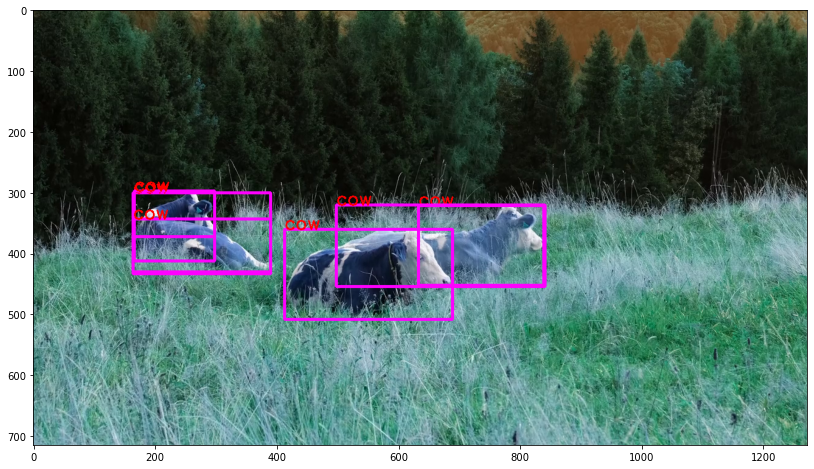

In [19]:
import matplotlib.pyplot as plt

proof = cv2.imread(r"F:\Uni Work\CV Lab\Lab 10\PROOF.png")

plt.figure(figsize=(14, 8))
plt.imshow(proof)